In [ ]:

import pandas as pd
import numpy as np
import nltk
from collections import Counter as ctr
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

df=pd.read_csv('/content/Symptom2Disease.csv')
df=pd.DataFrame(df)
#Retaining only the review and rating columns
col=["label","text"]
df=df.loc[:,col]

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)


1.5.0


In [ ]:
df.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [ ]:
df.value_counts()

label                    text                                                                                                                                                                                                                                                
Jaundice                 I've been feeling extremely scratchy, sick, and worn out. In addition, I've lost weight and have a temperature. My urine is dark, and my skin has turned yellow. Additionally, I have been experiencing stomach pain.                                   4
Dimorphic Hemorrhoids    I've been constipated and it's really hard to go to the bathroom. When I do go, it hurts and my stool has been bloody. I've also been having some pain in my butt and my anus has been really itchy and irritated.                                      3
Arthritis                I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without 

In [ ]:
ctr(df['label'])

Counter({'Psoriasis': 50,
         'Varicose Veins': 50,
         'Typhoid': 50,
         'Chicken pox': 50,
         'Impetigo': 50,
         'Dengue': 50,
         'Fungal infection': 50,
         'Common Cold': 50,
         'Pneumonia': 50,
         'Dimorphic Hemorrhoids': 50,
         'Arthritis': 50,
         'Acne': 50,
         'Bronchial Asthma': 50,
         'Hypertension': 50,
         'Migraine': 50,
         'Cervical spondylosis': 50,
         'Jaundice': 50,
         'Malaria': 50,
         'urinary tract infection': 50,
         'allergy': 50,
         'gastroesophageal reflux disease': 50,
         'drug reaction': 50,
         'peptic ulcer disease': 50,
         'diabetes': 50})

**Preprocess the Text**

In [ ]:

import string
import re
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if not already downloaded
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    exclude = set(string.punctuation)
    text = ''.join(ch for ch in text if ch not in exclude)

    # Define a set of contractions and their expanded forms
    contractions = {
        "dont": "do not", "arent": "are not", "isnt": "is not", "doesnt": "does not",
        "wont": "will not", "cant": "can not", "couldnt": "could not", "shouldnt": "should not",
        "wouldnt": "would not", "havent": "have not", "hasnt": "has not", "hadnt": "had not",
        "didnt": "did not", "mustnt": "must not", "im": "i am", "ill": "i will",
        "ive": "i have", "id": "i would", "youre": "you are", "youve": "you have",
        "youll": "you will", "youd": "you would", "hes": "he is", "hell": "he will",
        "hed": "he would", "shes": "she is", "shell": "she will", "shed": "she would",
        "its": "it is", "itll": "it will", "were": "we are", "weve": "we have",
        "well": "we will", "wed": "we would", "theyre": "they are", "theyve": "they have",
        "theyll": "they will", "theyd": "they would", "thats": "that is", "thatll": "that will",
        "whos": "who is", "wholl": "who will", "whats": "what is", "whatll": "what will",
        "wheres": "where is", "wherell": "where will", "whens": "when is", "whenll": "when will",
        "whys": "why is", "whyll": "why will", "hows": "how is", "howll": "how will"
    }

    # Define a set of auxiliary verbs to remove
    auxiliary_verbs = {"would", "have", "should"}

    # Remove contractions and specified auxiliary verbs
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    for verb in auxiliary_verbs:
        text = text.replace(verb, "")

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatization
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(token) for token in tokens]

    # Remove extra spaces
    text = ' '.join(tokens)
    text = re.sub(' +', ' ', text)

    return text

In [ ]:
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
df.value_counts()

label                    text                                                                                                                                      
Jaundice                 feeling extremely scratchy sick worn addition lost weight temperature urine dark skin turned yellow additionally experiencing stomach pain    4
Dimorphic Hemorrhoids    lot trouble bowel movement lately hard go hurt anus really sore bleeding go really painful really uncomfortable                               3
Arthritis                feeling really weak muscle neck really stiff joint swe willing hard move around without feeling stiff walking really painful                  3
Dimorphic Hemorrhoids    constipated really hard go bathroom go hurt stool bloody also pain butt anus really itchy irritated                                           3
Malaria                  high fever severe itching chi will vomiting also headache perspiring lot additionally hurting nausea muscle soreness                   

In [ ]:
df.head()

,label,text
0,Psoriasis,experiencing skin rash arm leg torso past week...
1,Psoriasis,skin peeling especially knee elbow scalp peeli...
2,Psoriasis,experiencing joint pain finger wrist knee pain...
3,Psoriasis,silver like dusting skin especially lower back...
4,Psoriasis,nail small dent pit often feel inflammatory te...


**Model Building**

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

In [ ]:

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
     ('nb', MultinomialNB()),
    ('svm', SVC(kernel='linear', probability=True))
]

In [ ]:

voting_classifier = VotingClassifier(estimators=base_models, voting='hard')

In [ ]:

voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('nb', MultinomialNB()),
                             ('svm', SVC(kernel='linear', probability=True))])

In [ ]:
accuracy = voting_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333


In [ ]:

 # Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

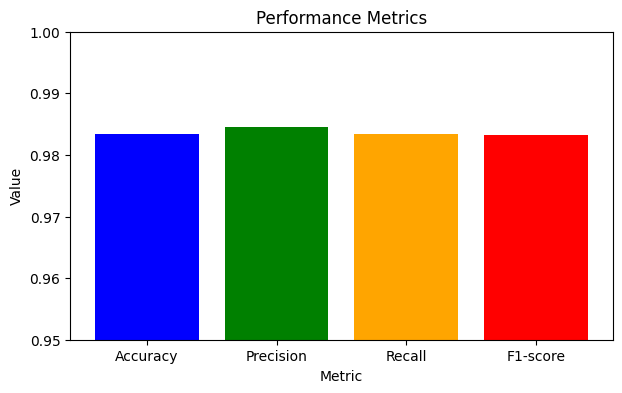

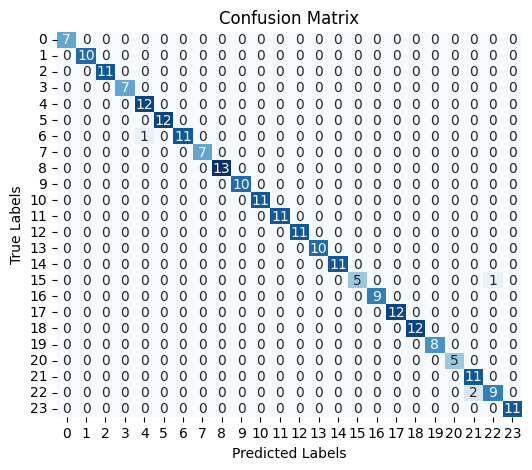

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Performance Metrics Visualization
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(7, 4))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0.95, 1.0)
plt.show()

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


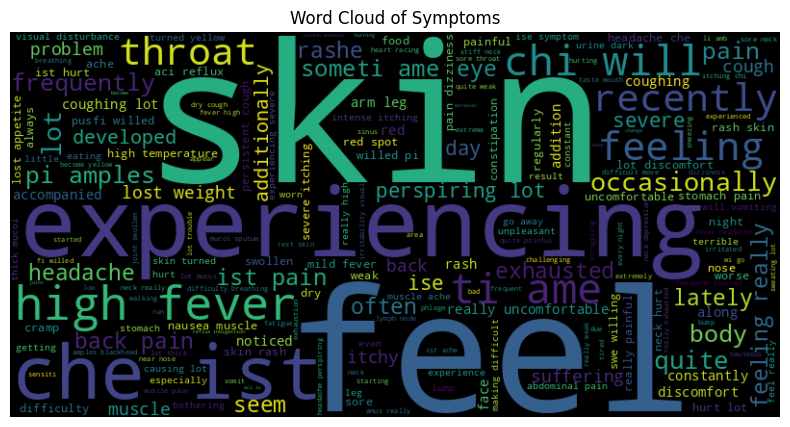

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract symptom names from the 'text' column
symptom_names = ' '.join(df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(symptom_names)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Symptoms')
plt.axis('off')
plt.show()


**Generate pickle files to save the model**

In [ ]:
import pickle

# Define filenames for each object
tfidf_filename = "tfidf_vectorizer.pkl"
label_encoder_filename = "label_encoder.pkl"
model_filename = "voting_classifier.pkl"

# Save the objects to pickle files
with open(tfidf_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

with open(label_encoder_filename, 'wb') as file:
    pickle.dump(label_encoder, file)

with open(model_filename, 'wb') as file:
    pickle.dump(voting_classifier, file)

print("All objects saved to pickle files.")


All objects saved to pickle files.


In [ ]:
import joblib

# Define filenames for each object
tfidf_filename = "tfidf_vectorizer.joblib"
label_encoder_filename = "label_encoder.joblib"
model_filename = "voting_classifier.joblib"

# Save the objects to joblib files
joblib.dump(tfidf_vectorizer, tfidf_filename)
joblib.dump(label_encoder, label_encoder_filename)
joblib.dump(voting_classifier, model_filename)

print("All objects saved to joblib files.")


All objects saved to joblib files.


**Predictions**

In [ ]:
sample_text = "I am having headache"
sample_text_processed = preprocess_text(sample_text)
print(sample_text_processed)
sample_text_transformed = tfidf_vectorizer.transform([sample_text_processed])
predicted_label_encoded = voting_classifier.predict(sample_text_transformed)
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

#predicted_label = label_encoder.inverse_transform(voting_classifier.predict(sample_text_transformed))

print("Predicted Label:", predicted_label)

headache
Predicted Label: ['Hypertension']


**Section 2: Disease Information using Wikipedia module**

In [ ]:
!pip install wikipedia

In [ ]:

import wikipedia

def get_available_sections(topic):
    try:
        # Search for the topic on Wikipedia
        search_results = wikipedia.search(topic)
        print("Please help me choose which of the following suits you query?")
        i=0
        while(i<5):
          print(i,": ",search_results[i])
          i=i+1
        value=(int)(input("Choose"))
        if search_results:
            # Retrieve the full content of the Wikipedia article
            full_content = wikipedia.page(search_results[value]).content

            # Extract section headings
            section_headings = []
            current_section = None
            for line in full_content.split('\n'):
                if line.startswith("== "):
                    current_section = line.strip("=").strip()
                    section_headings.append(current_section)
            return section_headings
        else:
            return []
    except wikipedia.exceptions.DisambiguationError as e:
        # If the search term is ambiguous, handle the disambiguation error
        return f"Ambiguous search term. Did you mean: {', '.join(e.options)}?"
    except wikipedia.exceptions.PageError:
        # If the page does not exist on Wikipedia, handle the page error
        return "Page not found on Wikipedia."

def get_section_content(topic, section_name):
    try:
        # Retrieve the full content of the Wikipedia article
        full_content = wikipedia.page(topic).content

        # Find the start and end indices of the section in the full content
        section_start_idx = full_content.find(f"== {section_name} ==")
        if section_start_idx == -1:
            return f"Section '{section_name}' not found in the article."

        # Find the end of the section or start of the next section
        next_section_start_idx = full_content.find("\n== ", section_start_idx + len(section_name) + 4)  # considering the length of the section name plus the equal signs
        if next_section_start_idx == -1:
            section_content = full_content[section_start_idx:]
        else:
            section_content = full_content[section_start_idx:next_section_start_idx]

        return section_content.strip()
    except wikipedia.exceptions.DisambiguationError as e:
        # If the search term is ambiguous, handle the disambiguation error
        return f"Ambiguous search term. Did you mean: {', '.join(e.options)}?"
    except wikipedia.exceptions.PageError:
        # If the page does not exist on Wikipedia, handle the page error
        return "Page not found on Wikipedia."



**Extracting medicines based on symptoms provided**

In [ ]:

df_medicine=pd.read_csv("/content/Medicine_Details.csv")

In [ ]:

df_medicine=df_medicine.iloc[:,:4]

In [ ]:
df_medicine.head(100)

,Medicine Name,Composition,Uses,Side_effects
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance
...,...,...,...,...
95,Aldactone 50 Tablet,Spironolactone (50mg),Hypertension (high blood pressure) Edema Low ...,Nausea Vomiting Leg cramps Dizziness Drowsines...
96,Alerid Tablet,Cetirizine (10mg),Treatment of Allergic conditions,Sleepiness Fatigue Vomiting Dryness in mouth H...
97,Aerocort Inhaler,Levosalbutamol (50mcg) + Beclometasone (50mcg),Asthma,Hoarseness of voice Headache Dizziness Pharyng...
98,Acemiz-S Tablet,Aceclofenac (100mg) + Paracetamol (325mg) + Se...,Pain relief,Nausea Vomiting Stomach pain Indigestion Heart...


In [ ]:

#preprocess the uses column of the dataset
df_medicine['Uses'] = df_medicine['Uses'].apply(preprocess_text)

In [ ]:

for index, row in df_medicine.iterrows():
    # Remove the word "treatment" from the 'Uses' column if present
    df_medicine.at[index, 'Uses'] = row['Uses'].replace('treatment', '')

In [ ]:
df_medicine.head(10)

,Medicine Name,Composition,Uses,Side_effects
0,Avastin 400mg Injection,Bevacizumab (400mg),cancer colon rectum nonsmall cell lung cancer ...,Rectal bleeding Taste change Headache Noseblee...
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),bacterial infection,Vomiting Nausea Diarrhea Mucocutaneous candidi...
2,Azithral 500 Tablet,Azithromycin (500mg),bacterial infection,Nausea Abdominal pain Diarrhea
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,cough mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...
4,Aciloc 150 Tablet,Ranitidine (150mg),gastroesophageal reflux disease aci reflux pe...,Headache Diarrhea Gastrointestinal disturbance
5,Allegra 120mg Tablet,Fexofenadine (120mg),sneezing runny nose due allergies allergic co...,Headache Drowsiness Dizziness Nausea
6,Avil 25 Tablet,Pheniramine (25mg),allergic conditions respiratory disease exces...,Sedation
7,Aricep 5 Tablet,Donepezil (5mg),alzhei amers disease,Common cold Urinary incontinence Rash Nausea D...
8,Amoxyclav 625 Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),bacterial infection,Vomiting Nausea Diarrhea Mucocutaneous candidi...
9,Atarax 25mg Tablet,Hydroxyzine (25mg),anxiety skin condition inflammation itching,Sedation Nausea Vomiting Upset stomach Constip...


In [ ]:
from google.colab import files
df_medicine.to_csv('data.csv', index=False)
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:

# Create TF-IDF vectorizers for each feature
tfidf_vectorizer_uses = TfidfVectorizer(stop_words='english')
tfidf_vectorizer_composition = TfidfVectorizer(stop_words='english')
tfidf_vectorizer_side_effects = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'Uses', 'Composition', and 'Side_effects' columns
tfidf_matrix_uses = tfidf_vectorizer_uses.fit_transform(df_medicine['Uses'].astype(str))
tfidf_matrix_composition = tfidf_vectorizer_composition.fit_transform(df_medicine['Composition'].astype(str))
tfidf_matrix_side_effects = tfidf_vectorizer_side_effects.fit_transform(df_medicine['Side_effects'].astype(str))


In [ ]:

# Ensure all matrices have the same number of rows
min_rows = min(tfidf_matrix_uses.shape[0], tfidf_matrix_composition.shape[0], tfidf_matrix_side_effects.shape[0])

# Trim matrices to have the same number of rows
tfidf_matrix_uses = tfidf_matrix_uses[:min_rows]
tfidf_matrix_composition = tfidf_matrix_composition[:min_rows]
tfidf_matrix_side_effects = tfidf_matrix_side_effects[:min_rows]

In [ ]:

from scipy.sparse import hstack
# Combine the matrices horizontally
tfidf_matrix_combined = hstack((tfidf_matrix_uses, tfidf_matrix_composition, tfidf_matrix_side_effects))

# Calculate cosine similarity between the combined TF-IDF matrix and itself
cosine_sim_combined = cosine_similarity(tfidf_matrix_combined, tfidf_matrix_combined)

In [ ]:

def recommend_medicines_by_text(input_text, tfidf_vectorizer_uses, tfidf_matrix_uses, tfidf_vectorizer_composition, tfidf_matrix_composition, tfidf_vectorizer_side_effects, tfidf_matrix_side_effects, df_medicine):
    # Create TF-IDF vectors for the given input text
    input_vector_uses = tfidf_vectorizer_uses.transform([input_text])
    input_vector_composition = tfidf_vectorizer_composition.transform([input_text])
    input_vector_side_effects = tfidf_vectorizer_side_effects.transform([input_text])

    # Calculate cosine similarity between input vectors and medicine vectors for each feature
    sim_scores_uses = cosine_similarity(tfidf_matrix_uses, input_vector_uses)
    sim_scores_composition = cosine_similarity(tfidf_matrix_composition, input_vector_composition)
    sim_scores_side_effects = cosine_similarity(tfidf_matrix_side_effects, input_vector_side_effects)

    # Average the cosine similarity scores from all features
    sim_scores_avg = (sim_scores_uses + sim_scores_composition + sim_scores_side_effects) / 3.0

    # Get indices of top similar medicines
    sim_scores_avg = sim_scores_avg.flatten()
    similar_indices = sim_scores_avg.argsort()[::-1][:5]  # Top 5 similar medicines

    # Get recommended medicine names, compositions, uses, and side effects
    recommended_medicines = df_medicine.iloc[similar_indices][['Medicine Name', 'Composition', 'Uses', 'Side_effects']]

    return recommended_medicines

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer for symptoms
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the 'Uses' column to create the TF-IDF matrix for symptoms
tfidf_matrix_uses = tfidf.fit_transform(df_medicine['Uses'])

**Simple Chatbot UI**

In [ ]:
def main():
    while(True):
        print("Pluto: Healthcare Chatbot")
        print("Hi, How may I help you today?")
        print("1: Analyse Symptoms")
        print("2: Access Information about diseases")
        print("3: Medicinal Info")
        user_input =input()
        if user_input == '1':
            print("Please share your symptoms to predict the disease you might be suffering from")
            symptom = input()
            symptom_text_processed = preprocess_text(symptom)
            symptom_text_transformed = tfidf_vectorizer.transform([symptom_text_processed])
            predicted_label_encoded = voting_classifier.predict(symptom_text_transformed)
            predicted_label = label_encoder.inverse_transform(predicted_label_encoded)
            print("You are probably suffering from: ", predicted_label)
            print("Please note that the diagnosis may not be accurate, consultation from a doctor is advised")
        elif user_input== '2':
            topic = input("Enter the disease you want to find information about: ")
            print("Available Sections:")
            sections = get_available_sections(topic)
            print("Please choose which result matches your query")
            for idx, section in enumerate(sections, start=1):
                print(f"{idx}. {section}")
            c = int(input("Enter the number corresponding to the section you want to view: "))
            if 1 <= c <= len(sections):
                chosen_section = sections[c - 1]
                section_content = get_section_content(topic, chosen_section)
                print(f"\nContent of '{chosen_section}':\n{section_content}")
            else:
                print("Invalid choice. Please enter a valid number.")
        elif user_input== '3':
            print("Please enter symptoms or disease name to fetch medicine details")
            symptoms = input()
            symptoms = preprocess_text(symptoms)
            recommended_medicines = recommend_medicines_by_text(symptoms, tfidf_vectorizer_uses, tfidf_matrix_uses, tfidf_vectorizer_composition, tfidf_matrix_composition, tfidf_vectorizer_side_effects, tfidf_matrix_side_effects, df_medicine)
            print("Here are the medicinal details for your symptoms:")
            display(recommended_medicines)
        else:
            print("Please choose a valid option")

        print("Do you wish to continue?")
        print("Enter 1 to continue")
        cont = input()
        if cont != '1':
            print("Hope I could help you today, Have a good day!")
            break

if __name__ == "__main__":
    main()


Pluto: Healthcare Chatbot
Hi, How may I help you today?
1: Analyse Symptoms
2: Access Information about diseases
3: Medicinal Info
3
Please enter symptoms or disease name to fetch medicine details
dandruff
Here are the medicinal details for your symptoms:


,Medicine Name,Composition,Uses,Side_effects
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),dandruff,Application site reactions burning irritation ...
4132,Ketamide Soap,Cetrimide (0.5% w/w) + Ketoconazole (2% w/w),dandruff,Application site reactions burning irritation ...
7671,Pelliwash Shampoo,Fluocinolone acetonide (0.01% w/v),dandruff,Application site reactions burning irritation ...
4149,Kerashine-CT Anti-Dandruff Lotion,Ketoconazole (2% w/v) + Coal Tar (4% w/v),dandruff,Application site reactions burning irritation ...
4153,Kitnor Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),dandruff,Application site reactions burning irritation ...


Do you wish to continue?
Enter 1 to continue
1
Pluto: Healthcare Chatbot
Hi, How may I help you today?
1: Analyse Symptoms
2: Access Information about diseases
3: Medicinal Info
1
Please share your symptoms to predict the disease you might be suffering from


**Using Nearest Neighbours (with cosine similarity) for medicinal info**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import joblib

# Step 1: Load and preprocess data
df_medicine = pd.read_csv('/content/Medicine_Details.csv')
# Assuming 'Description' is a column describing each medicine
df_medicine['Description'] = df_medicine['Uses']
df_medicine['Description'] = df_medicine['Description'].fillna('')

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_medicine['Description'])

# Step 3: Train Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
nn_model.fit(tfidf_matrix)
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(nn_model, 'nn_model.pkl')

['nn_model.pkl']

In [ ]:
def load_models(vectorizer_path, model_path):
    tfidf_vectorizer = joblib.load(vectorizer_path)
    nn_model = joblib.load(model_path)
    return tfidf_vectorizer, nn_model

# Recommendation function using loaded models
def recommend_medicines_by_text(input_text, tfidf_vectorizer, nn_model, df_medicine):
    # Transform input text into TF-IDF vector
    input_vector = tfidf_vectorizer.transform([input_text])

    # Find nearest neighbors (similar medicines) based on cosine similarity
    distances, indices = nn_model.kneighbors(input_vector)

    # Get recommended medicine details as DataFrame
    recommended_medicines_df = df_medicine.iloc[indices[0]][['Medicine Name', 'Composition', 'Uses', 'Side_effects']]

    return recommended_medicines_df

# Example usage after loading models
input_text = "fever"
loaded_tfidf_vectorizer, loaded_nn_model = load_models('tfidf_vectorizer.pkl', 'nn_model.pkl')
recommended_medicines_df = recommend_medicines_by_text(input_text, loaded_tfidf_vectorizer, loaded_nn_model, df_medicine)

# Print recommended medicines as a DataFrame
print(recommended_medicines_df)

                  Medicine Name                                Composition  \
91           Acton-OR Tablet SR  Paracetamol (300mg) + Paracetamol (700mg)   
7681            PA 12 Tablet SR  Paracetamol (300mg) + Paracetamol (700mg)   
11340  XTPara Proglet Tablet SR  Paracetamol (300mg) + Paracetamol (700mg)   
3681      Instaflex P Tablet SR  Paracetamol (300mg) + Paracetamol (700mg)   
8144   Qustain P 1000 Tablet SR  Paracetamol (300mg) + Paracetamol (700mg)   

                     Uses                 Side_effects  
91      Pain relief Fever  No common side effects seen  
7681    Pain relief Fever  No common side effects seen  
11340   Pain relief Fever  No common side effects seen  
3681    Pain relief Fever  No common side effects seen  
8144    Pain relief Fever  No common side effects seen  
